In [163]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
from salishsea_tools import geo_tools, nc_tools, tidetools
import xarray as xr
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

%matplotlib inline

In [2]:
ferry = nc.Dataset('https://salishsea.eos.ubc.ca/erddap/tabledap/ubcONCTWDP1mV1')

In [19]:
nc_tools.show_variables(ferry)

odict_keys(['s.time', 's.longitude', 's.latitude', 's.on_crossing_mask', 's.crossing_number', 's.temperature', 's.temperature_std_dev', 's.temperature_sample_count', 's.conductivity', 's.conductivity_std_dev', 's.conductivity_sample_count', 's.salinity', 's.salinity_std_dev', 's.salinity_sample_count', 's.o2_saturation', 's.o2_saturation_std_dev', 's.o2_saturation_sample_count', 's.o2_concentration_corrected', 's.o2_concentration_corrected_std_dev', 's.o2_concentration_corrected_sample_count', 's.cdom_fluorescence', 's.cdom_fluorescence_std_dev', 's.cdom_fluorescence_sample_count', 's.chlorophyll', 's.chlorophyll_std_dev', 's.chlorophyll_sample_count', 's.turbidity', 's.turbidity_std_dev', 's.turbidity_sample_count', 's.co2_partial_pressure', 's.co2_partial_pressure_std_dev', 's.co2_partial_pressure_sample_count', 's.co2_concentration_linearized', 's.co2_concentration_linearized_std_dev', 's.co2_concentration_linearized_sample_count'])


In [30]:
Bathy = nc.Dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc')

In [46]:
bathy, X, Y = tidetools.get_bathy_data(Bathy)

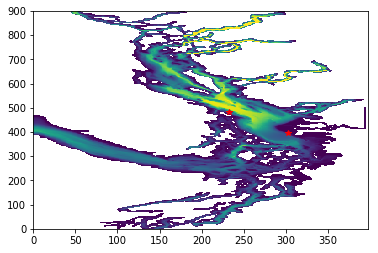

In [51]:
plt.pcolormesh(bathy)
plt.plot(303,396,'r*')
plt.plot(233,484,'r*')

In [22]:
ferry.variables['s.time']

<class 'netCDF4._netCDF4.Variable'>
float64 s.time(s)
    _CoordinateAxisType: Time
    actual_range: [  1.50154560e+09   1.50508794e+09]
    axis: T
    calendar: proleptic_gregorian
    cf_role: timeseries_id
    ioos_category: Time
    long_name: Time
    standard_name: time
    time_origin: 01-JAN-1970 00:00:00
    units: seconds since 1970-01-01T00:00:00Z
unlimited dimensions: 
current shape = (51840,)
filling off

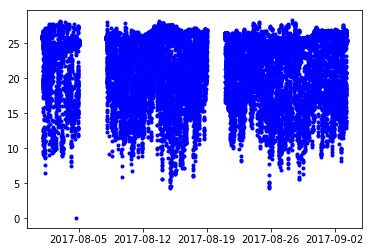

In [175]:
plt.plot(nc.num2date(ferry.variables['s.time'][:41000], 'seconds since 1970-01-01 00:00:00'),
         ferry.variables['s.salinity'][:41000], 'b.')

In [59]:
nowcast = xr.open_dataset('https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSg3DTracerFields1hV17-02')

In [74]:
import datetime

# Whole Ferry Dataset

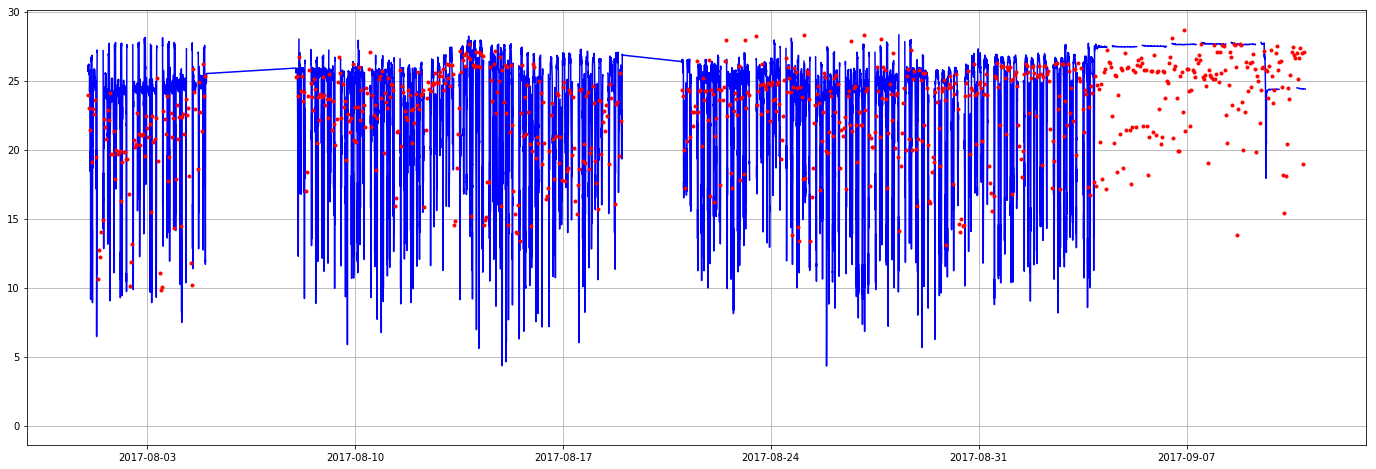

In [165]:
fig, ax = plt.subplots(figsize=(24,8))
ax.plot(nc.num2date(ferry.variables['s.time'][:], 'seconds since 1970-01-01 00:00:00'),
         ferry.variables['s.salinity'][:], 'b-')
for n in range(51840):
    if nc.num2date(ferry.variables['s.time'][n], 'seconds since 1970-01-01 00:00:00').minute == 0:
        if ferry.variables['s.longitude'][n].mask == False:
            Yind, Xind = geo_tools.find_closest_model_point(ferry.variables['s.longitude'][n], 
                                                            ferry.variables['s.latitude'][n],
                                                            X, Y, land_mask = bathy.mask)
            date = nc.num2date(ferry.variables['s.time'][n], 'seconds since 1970-01-01 00:00:00')
            s = (nowcast.salinity
                 .sel(time = date, depth = 0.5, method='nearest')
                 .isel(gridY = Yind, gridX = Xind)).values
            ax.plot(date, s, 'r.')
ax.grid('on')

# Slightly Cropped Ferry Dataset

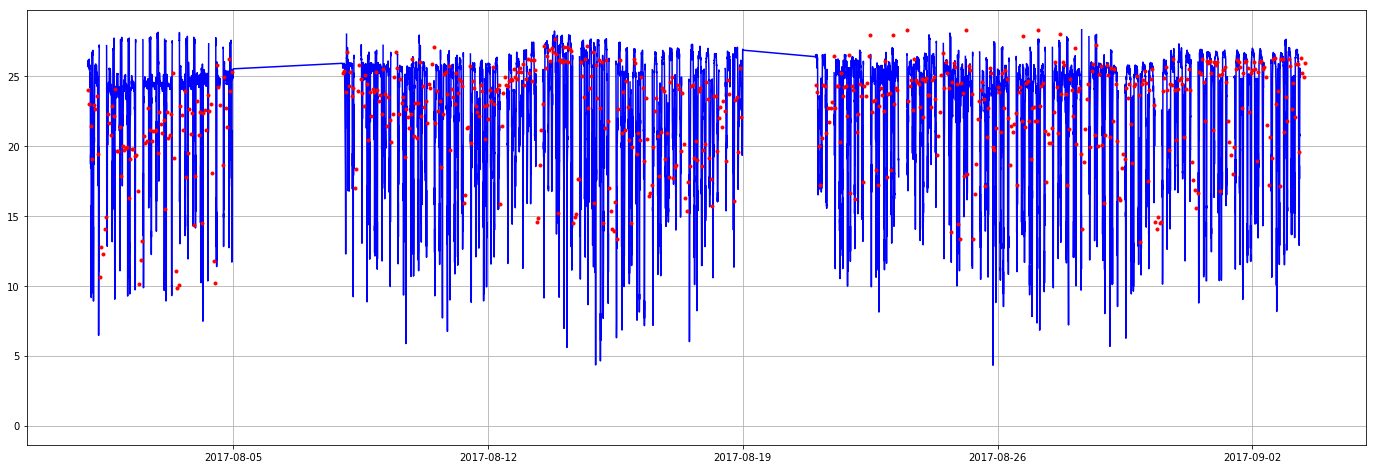

In [179]:
fig, ax = plt.subplots(figsize=(24,8))
ax.plot(nc.num2date(ferry.variables['s.time'][:41000], 'seconds since 1970-01-01 00:00:00'),
         ferry.variables['s.salinity'][:41000], 'b-')
for n in range(41000):
    if nc.num2date(ferry.variables['s.time'][n], 'seconds since 1970-01-01 00:00:00').minute == 0:
        if ferry.variables['s.longitude'][n].mask == False:
            Yind, Xind = geo_tools.find_closest_model_point(ferry.variables['s.longitude'][n], 
                                                            ferry.variables['s.latitude'][n],
                                                            X, Y, land_mask = bathy.mask)
            date = nc.num2date(ferry.variables['s.time'][n], 'seconds since 1970-01-01 00:00:00')
            s = (nowcast.salinity
                 .sel(time = date, depth = 0.5, method='nearest')
                 .isel(gridY = Yind, gridX = Xind)).values
            ax.plot(date, s, 'r.')
ax.grid('on')

# ~ Aug 27 - Aug 29

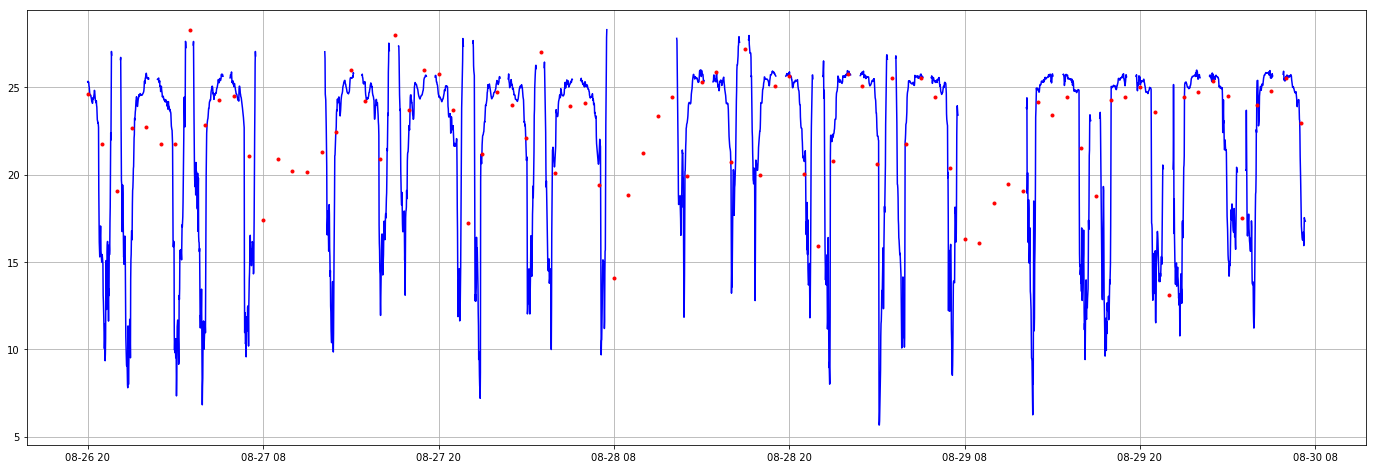

In [192]:
fig, ax = plt.subplots(figsize=(24,8))
ax.plot(nc.num2date(ferry.variables['s.time'][30000:35000], 'seconds since 1970-01-01 00:00:00'),
         ferry.variables['s.salinity'][30000:35000], 'b-')
for n in range(30000,35000):
    if nc.num2date(ferry.variables['s.time'][n], 'seconds since 1970-01-01 00:00:00').minute == 0:
        if ferry.variables['s.longitude'][n].mask == False:
            Yind, Xind = geo_tools.find_closest_model_point(ferry.variables['s.longitude'][n], 
                                                            ferry.variables['s.latitude'][n],
                                                            X, Y, land_mask = bathy.mask)
            date = nc.num2date(ferry.variables['s.time'][n], 'seconds since 1970-01-01 00:00:00')
            s = (nowcast.salinity
                 .sel(time = date, depth = 0.5, method='nearest')
                 .isel(gridY = Yind, gridX = Xind)).values
            ax.plot(date, s, 'r.')
ax.grid('on')

## ^^That actually looks kind of good???

In [186]:
def compare_ferry(ferry_data, nowcast_data, start_index, end_index, grid):
    bathy, X, Y = tidetools.get_bathy_data(grid)
    ferry = nc.Dataset(ferry_data)
    nowcast = xr.open_dataset(nowcast_data)
    fig, ax = plt.subplots(figsize=(24,8))
    time_unit = ferry.variables['s.time'].units
    ax.plot(nc.num2date(ferry.variables['s.time'][start_index:end_index], time_unit),
            ferry.variables['s.salinity'][start_index:end_index], 'b-')
    for n in range(start_index, end_index):
        if nc.num2date(ferry.variables['s.time'][n], time_unit).minute == 0:
            if ferry.variables['s.longitude'][n].mask == False:
                Yind, Xind = geo_tools.find_closest_model_point(ferry.variables['s.longitude'][n], 
                                                                ferry.variables['s.latitude'][n],
                                                                X, Y, land_mask = bathy.mask)
                date = nc.num2date(ferry.variables['s.time'][n], time_unit)
                s = (nowcast.salinity
                     .sel(time = date, depth = 0.5, method='nearest')
                     .isel(gridY = Yind, gridX = Xind)).values
                ax.plot(date, s, 'r.')
    ax.grid('on')

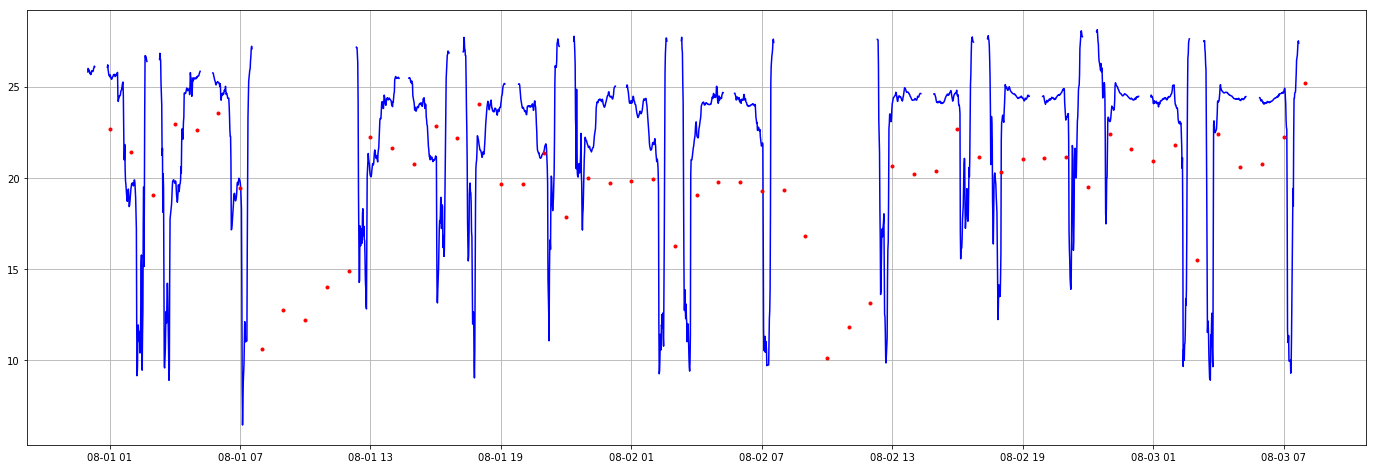

In [193]:
compare_ferry('https://salishsea.eos.ubc.ca/erddap/tabledap/ubcONCTWDP1mV1', 'https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSg3DTracerFields1hV17-02',
             1, 3400, nc.Dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc'))